## 各種 API
### numpy
各種数値計算を高速で行う(中身は C++ライブラリらしい)
公式：https://numpy.org/
ただし，日本語でもたくさん解説してくれているサイトがあるので，ググった方が早い場合もある

### pandas
行列計算，データ分析に優れたライブラリ
python 上で使う excel 的な感覚
公式：https://pandas.pydata.org/
こちらも numpy ほどではないが日本語解説が充実

### scikit-learn
データ分析，機械学習に優れたライブラリ
深層学習などと異なり，古く古典的な手法が多い(だいたいのデータ分析はこれで事足りる)
https://scikit-learn.org/stable/
numpy や pandas ほどではないが日本語解説が充実しているが，マニアックな関数は API を読むべき

### Kaggle
今回のデータの入手元: https://www.kaggle.com/c/titanic/data
タイタニックの生存者を当てる課題
今回使う test data への制度は kaggle アカウントがないとわからないので，今回は validation data への精度で代用．


In [ ]:
import pandas as pd
import numpy as np
from copy import deepcopy as cp
import time

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
import seaborn

%matplotlib inline

## Google ドライブに接続
Google ドライブ内のファイルを使うためにはアカウント接続認証が必要

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# google ドライブのディレクトリ名を特定
import os
print(os.getcwd())
!ls /content/drive

/content
MyDrive


## PCA (主成分分析)
ドキュメント: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

<class 'numpy.ndarray'>
(178, 13)
主成分の分散説明率
[0.36198848 0.1920749 ]
固有ベクトル
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


<function matplotlib.pyplot.show>

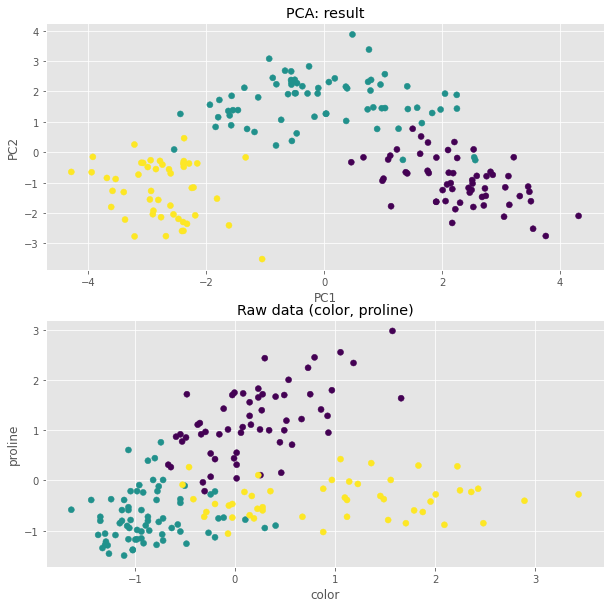

In [ ]:
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing #機械学習用のライブラリを利用
from sklearn.decomposition import PCA

# Wineのデータセットを読み込む
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X=df_wine_all.iloc[:,1:].values # 品種以外の特徴量 (13次元)
Y=df_wine_all.iloc[:,0].values # 3種類のブドウの品種
print(type(X))
print(X.shape)

# データの整形
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)

# 主成分分析 (PCA)
## 12 次元のデータを 2次元に圧縮している
n_components = 2 # 圧縮した後の次元数
pca = PCA(n_components=n_components)
X_transformed = pca.fit_transform(X)

# PCA 結果
print("主成分の分散説明率")
print(pca.explained_variance_ratio_)
print("固有ベクトル")
print(pca.components_)

# 結果をプロット
# 本12 次元のデータ -> PCA で2次元圧縮したデータを plot している
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: result')

## 本当は 12 次元のデータのうち2次元を選択して plot している
plt.subplot(2, 1, 2)
plt.scatter(X[:,9],X[:,12], c=Y)
### X[:,9] <- color
### X[:,12] <- proline
plt.xlabel('color')
plt.ylabel('proline')
plt.title('Raw data (color, proline)')

plt.show

In [ ]:
# クラスタが追加されているかの確認
print(df_wine_all.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')


## K-means
ドキュメント： https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

<function matplotlib.pyplot.show>

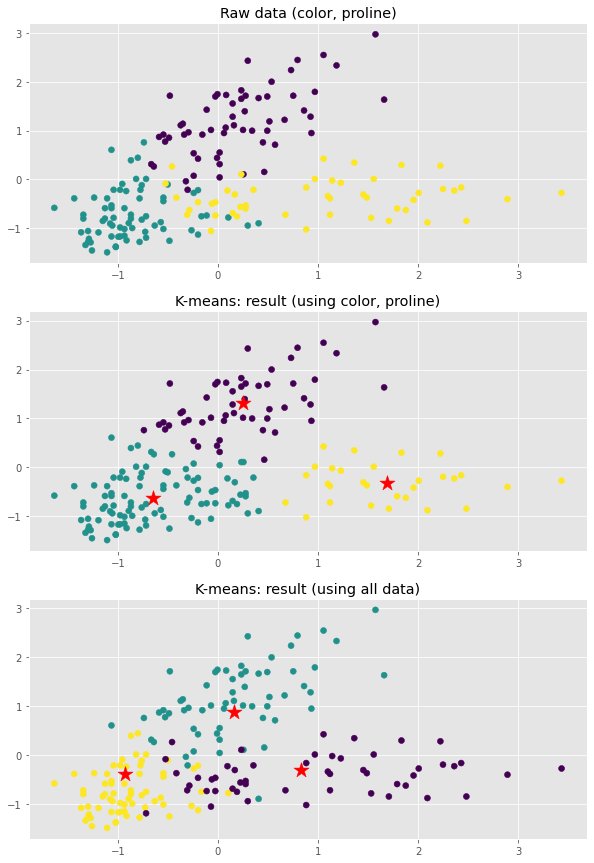

In [ ]:
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

# Wineのデータセットを読み込む
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
## 全データを使わない
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

# データの整形
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

# 生データプロット
%matplotlib inline
plt.figure(figsize=(10,15))
x=X_norm[:,0]
y=X_norm[:,1]
z=df_wine["class"]
plt.subplot(3, 1, 1)
plt.scatter(x,y, c=z)
plt.title('Raw data (color, proline)')
plt.show

# ミニバッチk-meansやk-meansを実施
n_clusters = 3 # 分割するクラスター数(K)
km=cluster.KMeans(n_clusters=n_clusters)
z_km=km.fit(X_norm)

# 結果をプロット
plt.subplot(3, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('K-means: result (using color, proline)')
plt.show

# 全データの整形
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X_all=df_wine_all.iloc[:,1:].values
sc=preprocessing.StandardScaler()
sc.fit(X_all)
X_all_norm=sc.transform(X_all)

# minibatch k-means or k-means
n_clusters = 3 # 分割するクラスター数(K)
km=cluster.KMeans(n_clusters=n_clusters)
z_km=km.fit(X_all_norm)

# 結果をプロット
plt.subplot(3, 1, 3)
plt.scatter(x,y, c=z_km.labels_)
### X[:,9] <- color
x=X_all_norm[:,9]
### X[:,12] <- proline
y=X_all_norm[:,12]
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('K-means: result (using all data)')
plt.show


## SpectralClustering
K-means との比較  
ドキュメント： https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<function matplotlib.pyplot.show>

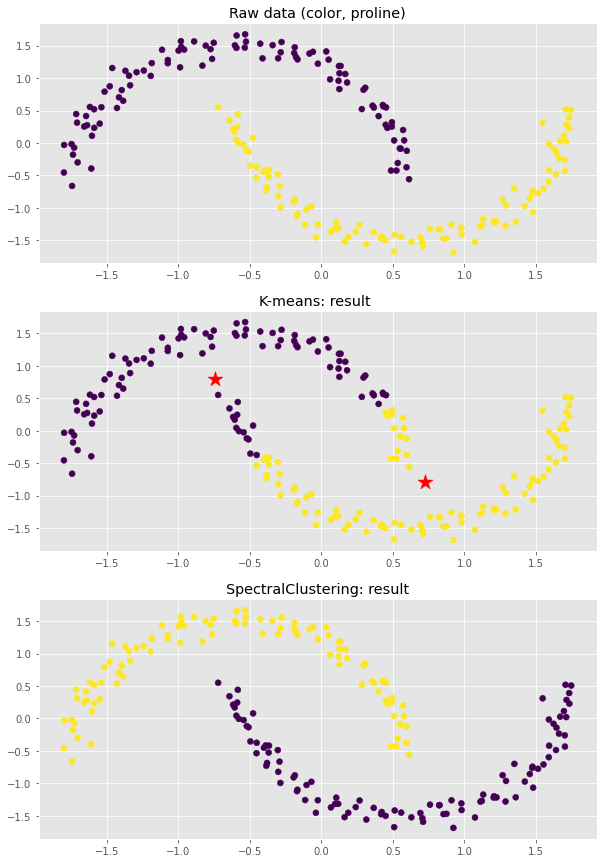

In [ ]:
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing #機械学習用のライブラリを利用
from sklearn import datasets #使用するデータ

# moon型 = 三日月二つのデータを生成する
X,z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

# データの整形
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

# 生データプロット
%matplotlib inline
plt.figure(figsize=(10,15))
x=X_norm[:,0]
y=X_norm[:,1]
plt.subplot(3, 1, 1)
plt.scatter(x,y, c=z)
plt.title('Raw data (color, proline)')
plt.show

# K-Means
n_clusters = 2 # 分割するクラスター数(K)
km=cluster.KMeans(n_clusters=n_clusters)
z_km=km.fit(X_norm)

# 結果をプロット
plt.subplot(3, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('K-means: result ')
plt.show

# SpectralClustering
n_clusters = 2 # 分割するクラスター数(K)
km=cluster.SpectralClustering(n_clusters=n_clusters, affinity="nearest_neighbors")
z_km=km.fit(X_norm)

# 結果をプロット
plt.subplot(3, 1, 3)
plt.scatter(x,y, c=z_km.labels_)
plt.title('SpectralClustering: result')
plt.show

## GMM (Gaussian mixture models)
ドキュメント: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

<function matplotlib.pyplot.show>

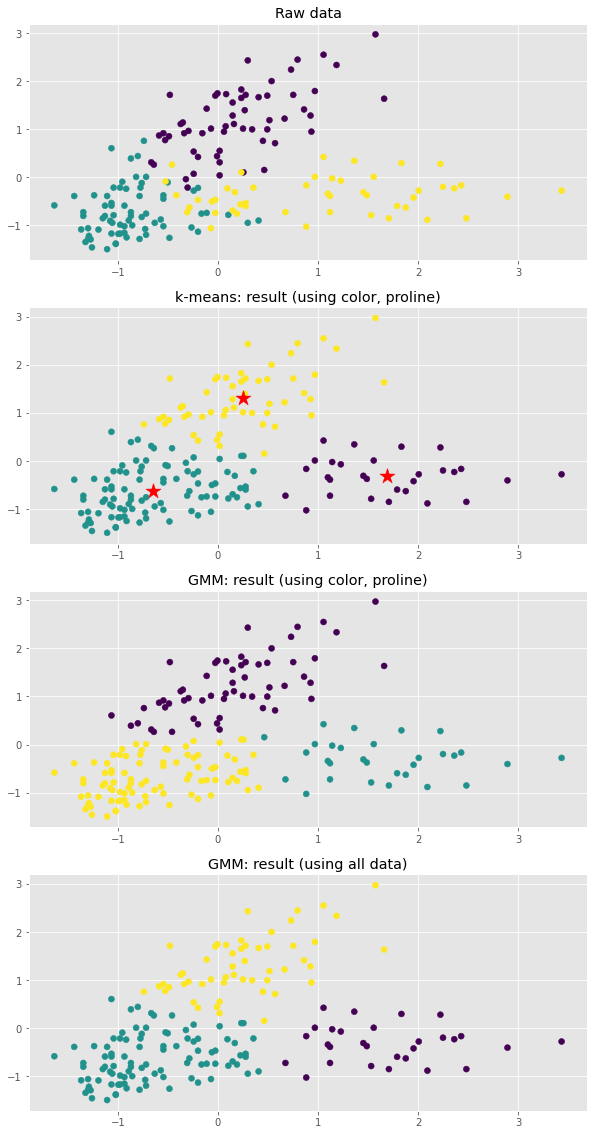

In [ ]:
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing, mixture #機械学習用のライブラリを利用

# Wineのデータセットを読み込む
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる


# データの整形
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)


# 生データプロット
%matplotlib inline
plt.figure(figsize=(10,20))
x=X_norm[:,0]
y=X_norm[:,1]
z=df_wine["class"]
plt.subplot(4, 1, 1)
plt.scatter(x,y, c=z)
plt.title('Raw data')
plt.show


# k-means
n_clusters = 3 # 分割するクラスター数(K)
km=cluster.KMeans(n_clusters=n_clusters)
z_km=km.fit(X_norm)
# 結果をプロット
plt.subplot(4, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('k-means: result (using color, proline)')
plt.show

#  GMMを実施
n_components = 3 # 想定する分布の数 (最大クラスター数)
gmm=mixture.GaussianMixture(n_components=n_components, covariance_type='full')
z_gmm=gmm.fit(X_norm)
z_gmm=z_gmm.predict(X_norm)

# 結果をプロット
plt.subplot(4, 1, 3)
plt.scatter(x,y, c=z_gmm)
plt.title('GMM: result (using color, proline)')
plt.show

# 全データの整形
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X_all=df_wine_all.iloc[:,1:].values
sc=preprocessing.StandardScaler()
sc.fit(X_all)
X_all_norm=sc.transform(X_all)

# GMM　を実施
n_components = 3 # 想定する分布の数 (最大クラスター数)
gmm=mixture.GaussianMixture(n_components=n_components, covariance_type='full')
z_gmm=gmm.fit(X_all_norm)
z_gmm=z_gmm.predict(X_all_norm)

# 結果をプロット
plt.subplot(4, 1, 4)
### X[:,9] <- color
x=X_all_norm[:,9]
### X[:,12] <- proline
y=X_all_norm[:,12]
plt.scatter(x,y, c=z_km.labels_)
plt.title('GMM: result (using all data)')
plt.show


<function matplotlib.pyplot.show>

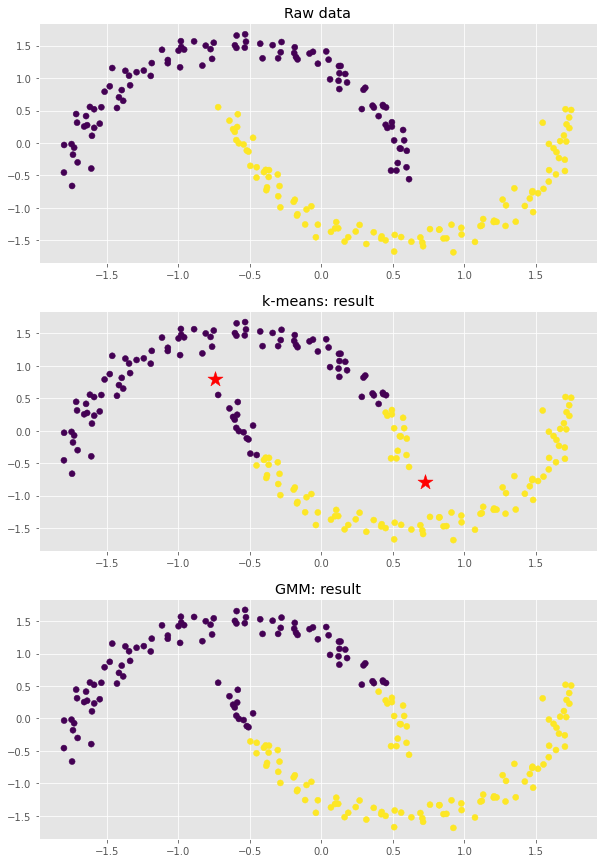

In [ ]:
# moon型のデータを読み込む
X,z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

# データの整形
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

# 生データプロット
%matplotlib inline
plt.figure(figsize=(10,15))
x=X_norm[:,0]
y=X_norm[:,1]
plt.subplot(3, 1, 1)
plt.scatter(x,y, c=z)
plt.title('Raw data')
plt.show

# K-Means
n_clusters = 2 # 分割するクラスター数(K)
km=cluster.KMeans(n_clusters=n_clusters)
z_km=km.fit(X_norm)

# 結果をプロット
plt.subplot(3, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('k-means: result')
plt.show

# GMM　を実施
n_components = 2 # 想定する分布の数 (最大クラスター数)
gmm=mixture.GaussianMixture(n_components=n_components, covariance_type='full')
z_gmm=gmm.fit(X_norm)
z_gmm=z_gmm.predict(X_norm)

# 結果をプロット
plt.subplot(3, 1, 3)
plt.scatter(x,y, c=z_gmm)
plt.title('GMM: result')
plt.show

## MeanShift
ドキュメント: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

[[-0.6207637  -0.59667224]
 [ 1.49736922 -0.30032022]]
[[-0.02628612 -0.18899354 -0.06924431 -0.10093188 -0.13828617  0.03245569
   0.0857013  -0.07181726 -0.09961432 -0.2061712   0.1639728   0.16191981
   0.01937663]
 [-0.82015579 -0.9901359  -1.46158875 -0.78923218  3.50540761 -0.33934021
  -0.23017911 -0.74014117  2.20021082 -0.9118964   0.91790685  0.08236605
   0.17442558]]


<function matplotlib.pyplot.show>

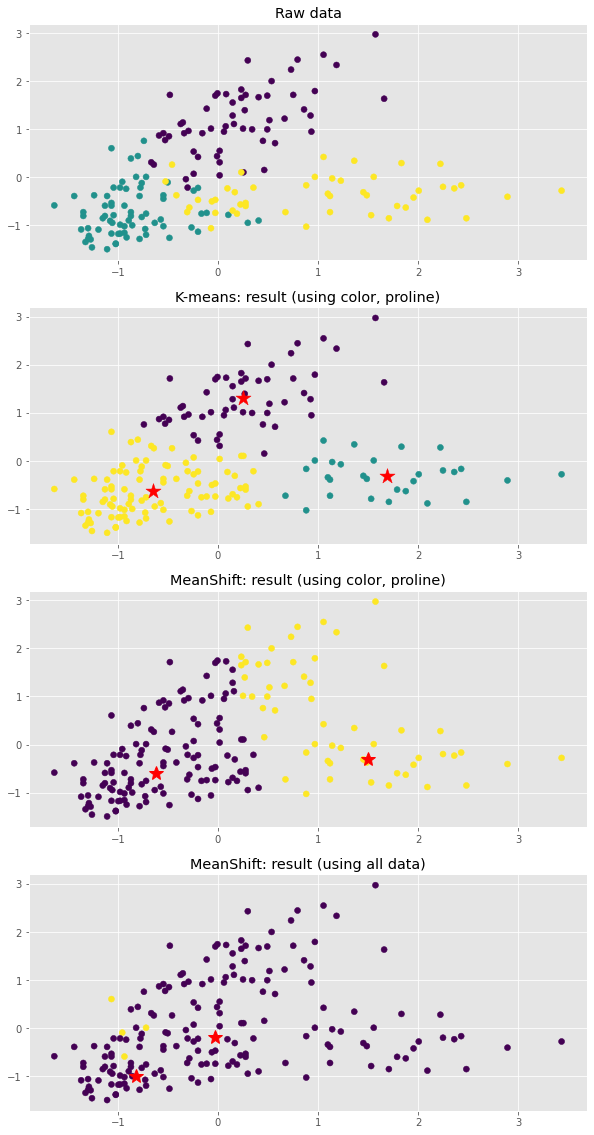

In [ ]:
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing, mixture #機械学習用のライブラリを利用

# Wineのデータセットを読み込む
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

# データの整形
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

# 生データプロットしてみる
%matplotlib inline
plt.figure(figsize=(10,20))
x=X_norm[:,0]
y=X_norm[:,1]
z=df_wine["class"]
plt.subplot(4, 1, 1)
plt.scatter(x,y, c=z)
plt.title('Raw data')
plt.show

# k-meansを実施
n_clusters = 3 # 分割するクラスター数(K)
km=cluster.KMeans(n_clusters=n_clusters)
z_km=km.fit(X_norm)

# 結果をプロット
plt.subplot(4, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('K-means: result (using color, proline)')
plt.show

# MeanShift
ms = cluster.MeanShift(seeds=X_norm)
ms.fit(X_norm)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

# 結果をプロット
plt.subplot(4, 1, 3)
plt.scatter(x,y, c=labels)
plt.plot(cluster_centers[0,0], cluster_centers[0,1], marker='*',c='red', markersize=14)
plt.plot(cluster_centers[1,0], cluster_centers[1,1], marker='*',c='red', markersize=14)
plt.title('MeanShift: result (using color, proline)')
plt.show

# 全データの整形
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X_all=df_wine_all.iloc[:,1:].values
sc=preprocessing.StandardScaler()
sc.fit(X_all)
X_all_norm=sc.transform(X_all)

# MeanShift を実施
ms = cluster.MeanShift(seeds=X_all_norm)
ms.fit(X_all_norm)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

# 結果をプロット
plt.subplot(4, 1, 4)
### X[:,9] <- color
x=X_all_norm[:,9]
### X[:,12] <- proline
y=X_all_norm[:,12]
plt.scatter(x,y, c=labels)
plt.plot(cluster_centers[0,0], cluster_centers[0,1], marker='*',c='red', markersize=14)
plt.plot(cluster_centers[1,0], cluster_centers[1,1], marker='*',c='red', markersize=14)
plt.title('MeanShift: result (using all data)')
plt.show

[[-0.64865094  0.9321116 ]
 [ 0.53875453 -0.93771485]]


<function matplotlib.pyplot.show>

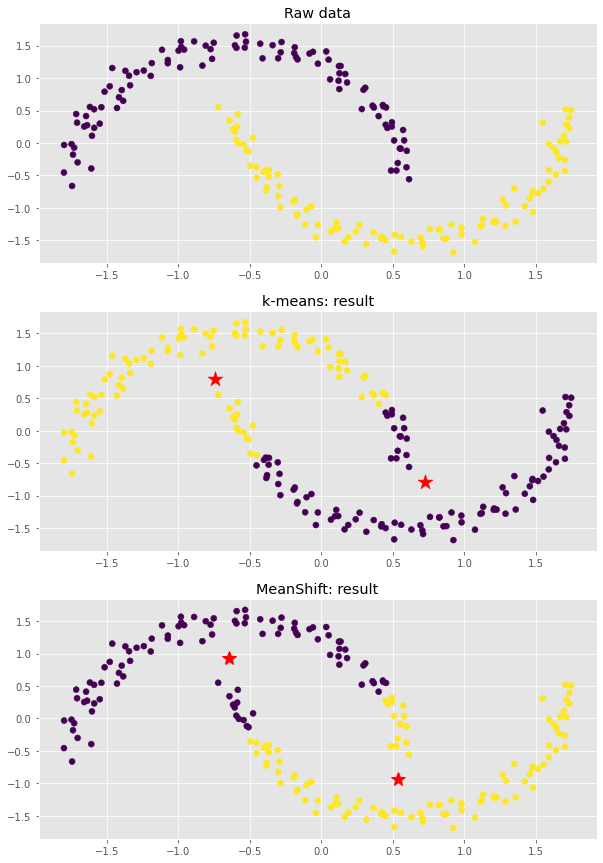

In [ ]:
# moon型のデータを読み込む
X,z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

# データの整形
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

# 生データプロット
%matplotlib inline
plt.figure(figsize=(10,15))
x=X_norm[:,0]
y=X_norm[:,1]
plt.subplot(3, 1, 1)
plt.scatter(x,y, c=z)
plt.title('Raw data')
plt.show

# K-Means
n_clusters = 2 # 分割するクラスター数(K)
km=cluster.KMeans(n_clusters=n_clusters)
z_km=km.fit(X_norm)

# 結果をプロット
plt.subplot(3, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('k-means: result')
plt.show

# MeanShift　を実施
ms = cluster.MeanShift(seeds=X_norm)
ms.fit(X_norm)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

# 結果をプロット
plt.subplot(3, 1, 3)
plt.scatter(x,y, c=labels)
plt.plot(cluster_centers[0,0], cluster_centers[0,1], marker='*',c='red', markersize=14)
plt.plot(cluster_centers[1,0], cluster_centers[1,1], marker='*',c='red', markersize=14)
plt.title('MeanShift: result')
plt.show

## VBGMM (Variational Bayesian Gaussian Mixture)
ドキュメント: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html

<function matplotlib.pyplot.show>

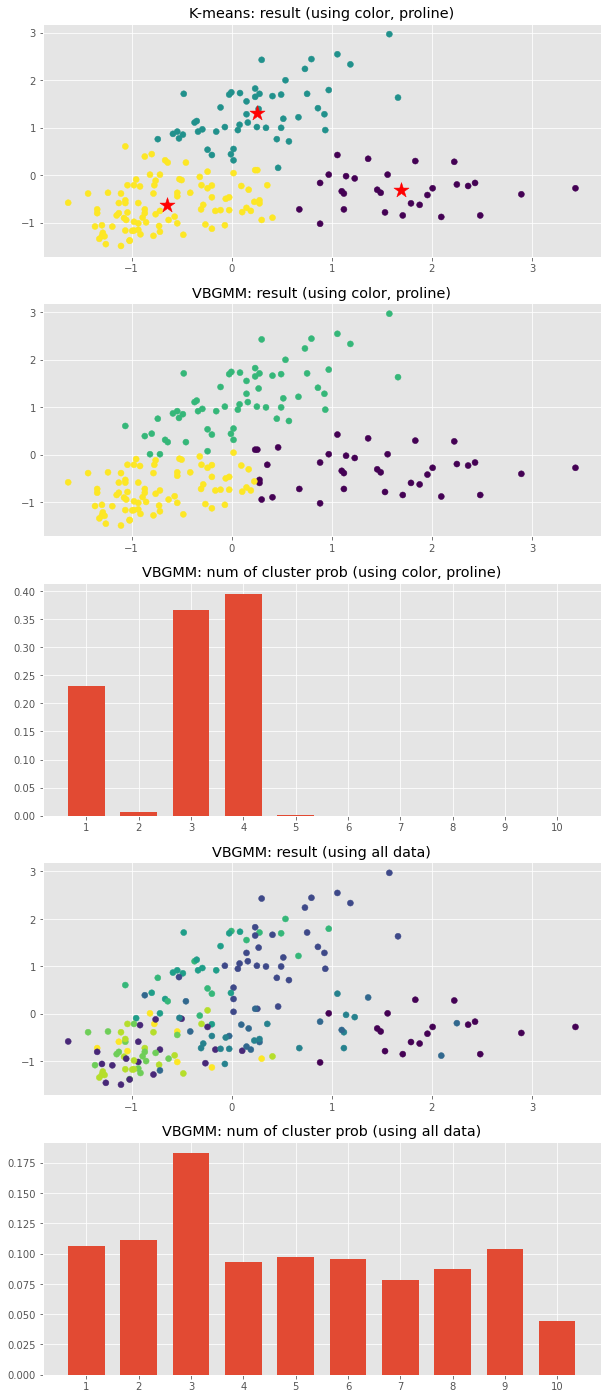

In [ ]:
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing, mixture #機械学習用のライブラリを利用

# Wineのデータセットを読み込む
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

# データの整形
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

# 生データプロット
%matplotlib inline
x=X_norm[:,0]
y=X_norm[:,1]
z=df_wine["class"]
plt.figure(figsize=(10, 30))
plt.subplot(4, 1, 1)
plt.scatter(x,y, c=z)
plt.title('Raw data')
plt.show

# k-means
n_clusters = 3 # 分割するクラスター数(K)
km=cluster.KMeans(n_clusters=n_clusters)
z_km=km.fit(X_norm)

# 結果をプロット
plt.subplot(6, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('K-means: result (using color, proline)')
plt.show

# VBGMM を実施
n_components = 10 # 想定する分布の数 (最大クラスター数)
vbgm = mixture.BayesianGaussianMixture(n_components=n_components, random_state=6)
vbgm=vbgm.fit(X_norm)
labels=vbgm.predict(X_norm)

# 結果をプロット
plt.subplot(6, 1, 3)
plt.scatter(x,y, c=labels)
plt.title('VBGMM: result (using color, proline)')
plt.show

# クラスター数の確率結果をプロット
#print(vbgm.weights_)
plt.subplot(6, 1, 4)
x_tick =np.array([1,2,3,4,5,6,7,8,9,10])
plt.bar(x_tick, vbgm.weights_, width=0.7, tick_label=x_tick)
plt.title('VBGMM: num of cluster prob (using color, proline)')
plt.show

# 全データの整形
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X_all=df_wine_all.iloc[:,1:].values
sc=preprocessing.StandardScaler()
sc.fit(X_all)
X_all_norm=sc.transform(X_all)

# VBGMM を実施
n_components = 10 # 想定する分布の数 (最大クラスター数)
vbgm = mixture.BayesianGaussianMixture(n_components=n_components, random_state=6)
vbgm=vbgm.fit(X_all_norm)
labels=vbgm.predict(X_all_norm)

# 結果をプロット
plt.subplot(6, 1, 5)
### X[:,9] <- color
x=X_all_norm[:,9]
### X[:,12] <- proline
y=X_all_norm[:,12]
plt.scatter(x,y, c=labels)
plt.title('VBGMM: result (using all data)')
plt.show

# クラスター数の確率結果をプロット
#print(vbgm.weights_)
plt.subplot(6, 1, 6)
x_tick =np.array([1,2,3,4,5,6,7,8,9,10])
# x_tick =np.array([1,2,3])
plt.bar(x_tick, vbgm.weights_, width=0.7, tick_label=x_tick)
plt.title('VBGMM: num of cluster prob (using all data)')
plt.show

<function matplotlib.pyplot.show>

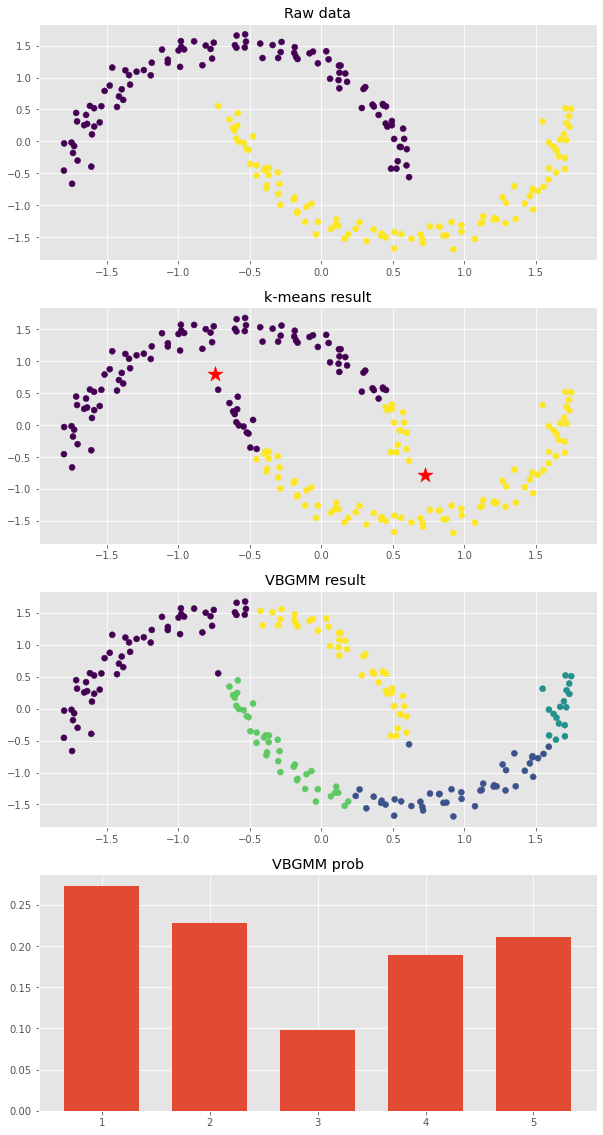

In [ ]:
# moon型のデータを読み込む
X,z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

# データの整形
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

# 生データプロット
%matplotlib inline
plt.figure(figsize=(10,20))
x=X_norm[:,0]
y=X_norm[:,1]
plt.subplot(4, 1, 1)
plt.scatter(x,y, c=z)
plt.title('Raw data')
plt.show

# K-Means
n_clusters = 2 # 分割するクラスター数(K)
km=cluster.KMeans(n_clusters=n_clusters)
z_km=km.fit(X_norm)

# 結果をプロット
plt.subplot(4, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('k-means result')
plt.show

# VBGMM を実施
n_components = 5 # 想定する分布の数 (最大クラスター数)
vbgm = mixture.BayesianGaussianMixture(n_components=n_components, random_state=6)
vbgm=vbgm.fit(X_norm)
labels=vbgm.predict(X_norm)

# 結果をプロット
plt.subplot(4, 1, 3)
plt.scatter(x,y, c=labels)
plt.title('VBGMM result ')
plt.show

# クラスター数の確率結果をプロット
#print(vbgm.weights_)
plt.subplot(4, 1, 4)
x_tick =np.array([1,2, 3, 4, 5])
plt.bar(x_tick, vbgm.weights_, width=0.7, tick_label=x_tick)
plt.title('VBGMM prob')
plt.show

## 課題 1
クラスタリングした変数を使って特徴量を作り追加してなるべく高い valid accuracy  
授業で使ったどの教師あり学習手法(決定木系でも良いし, SVM などでも良い)を使っても良い．  
ハイパーパラメータは変更しても良い． 
ただし, 教師なしのクラスタリングした特徴量は必ず入れること  
それ以外の新たな特徴量の追加は不可能  
Validation scores が 0.82 を超えていれば合格  
それ以上は高いごとにプラス加点  

この課題自体が追加加点用(できなくても減点にはしない)

## 学習に使うファイルを用意
授業用フォルダの `AIP1_2020_student` フォルダ直下にある，  
- train.csv  
- test.csv  

を自分の Google ドライブの `Colab Notebooks` フォルダに保存すること．  

In [ ]:
# ファイルを読み込む
# 入手元: https://www.kaggle.com/c/titanic/data
# フォルダ名を場所によって切り替える
drive_dir_ = '/content/drive/"My Drive"/'
drive_dir = '/content/drive/My Drive/'

file_dir = 'Colab Notebooks' # 生徒が課題をやるとき(必ずマイドライブの Colab Notebooks に train.csv と test.csv に保存すること)
# file_dir = 'AIP1_2020_student' # 授業中に教師が実行するとき

train_csv = 'train.csv'
test_csv = 'test.csv'

# No such file or directory と 「出なければ」 ちゃんとファイルを認識している
!ls -l $drive_dir_"$file_dir/"$train_csv
!ls -l $drive_dir_"$file_dir/"$test_csv

-rw------- 1 root root 61194 Oct 16 05:13 '/content/drive/My Drive/Colab Notebooks/train.csv'
-rw------- 1 root root 28629 Oct 16 05:12 '/content/drive/My Drive/Colab Notebooks/test.csv'


In [ ]:
# ファイルの読み込み
origin_train_df = pd.read_csv(os.path.join(drive_dir, file_dir, train_csv))
origin_test_df = pd.read_csv(os.path.join(drive_dir, file_dir, test_csv))

## データの確認

In [ ]:
# 列名を確認
# test には Survived ＝ 生存したかどうか ＝ 教師信号が抜けていることを確認
print('train_df.columns: {}'.format(list(origin_train_df.columns)))
print('test_df.columns:  {}'.format(list(origin_test_df.columns)))

train_df.columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
test_df.columns:  ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


- PassengerID: 乗客のID（単なる通し番号），
- Survived: 生き残ったら1，そうでなければ0
- Pclass: 客室のランク（1, 2, 3の3段階で1が高級，2が中級，3が下級），
- Name: 乗客名
- Sex: 性別
- Age: 年齢
- SibSp: 乗客の同乗兄弟（あるいは配偶者）数，
- Parch: 乗客の同乗親（あるいは子）数，
- Ticket: チケット番号，
- Fare: 料金，
- Cabin: 客室番号，
- Embarked: 乗船地（C = Cherbourg, Q = Queenstown, S = Southampton）

In [ ]:
#訓練用データのデータ数、平均などの統計量を出力
origin_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#テスト用データのデータ数、平均などの統計量を出力
origin_test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#訓練用データ
origin_train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#テスト用データ
origin_test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# 訓練データと valid データの分割
train_df, valid_df = train_test_split(origin_train_df, test_size=0.2, random_state=0) # 乱数シードを固定して train をさらに test と valid data を 8:2 で分割

In [ ]:
# 訓練データのデータ数、平均などの統計量を出力
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,571.000000,712.000000,712.000000,712.00000
mean,443.283708,0.383427,2.317416,29.745184,0.529494,0.391854,31.86295
std,260.003783,0.486563,0.833767,14.619046,1.140842,0.821368,50.13531
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.00000
25%,211.750000,0.000000,2.000000,20.750000,0.000000,0.000000,7.91770
50%,441.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.45625
75%,671.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.27500
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [ ]:
# valid データのデータ数、平均などの統計量を出力
valid_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,179.000000,179.000000,179.000000,143.000000,179.000000,179.000000,179.000000
mean,456.804469,0.385475,2.273743,29.515175,0.497207,0.340782,33.561615
std,246.941313,0.488073,0.846628,14.199825,0.938408,0.742802,48.008223
min,2.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,264.000000,0.000000,1.000000,20.000000,0.000000,0.000000,7.972900
50%,485.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.000000
75%,656.500000,1.000000,3.000000,39.500000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,64.000000,5.000000,5.000000,263.000000


## データの傾向性を見る

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'fraquency')

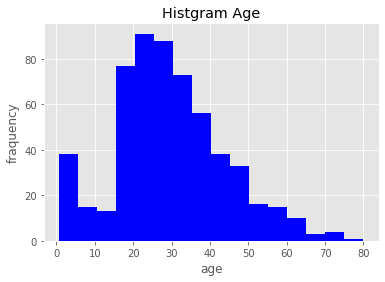

In [ ]:
# ヒストグラム
## 年齢
plt.style.use('ggplot') 
plt.hist(train_df['Age'], bins=16, color='b')
plt.title('Histgram Age')
plt.xlabel('age')
plt.ylabel('fraquency')

Text(0, 0.5, 'fraquency')

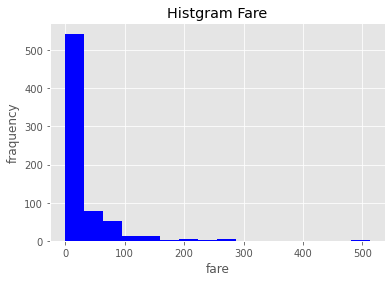

In [ ]:
# ヒストグラム
## 年齢
plt.style.use('ggplot') 
plt.hist(train_df['Fare'], bins=16, color='b')
plt.title('Histgram Fare')
plt.xlabel('fare')
plt.ylabel('fraquency')

Text(0, 0.5, 'fraquency')

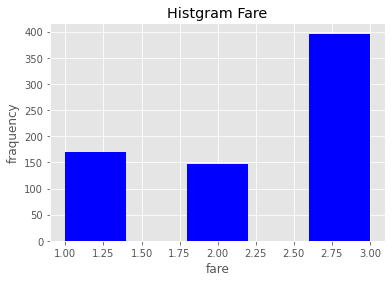

In [ ]:
# ヒストグラム
## Pclass
plt.style.use('ggplot') 
plt.hist(train_df['Pclass'], bins=5, color='b')
plt.title('Histgram Fare')
plt.xlabel('fare')
plt.ylabel('fraquency')

## データの欠損を埋める

In [ ]:
#年齢の欠損値を男女の平均年齢で補間
age_train_mean = origin_train_df.groupby('Sex').Age.mean()
 
def fage(x):
    if x.Sex == 'male':
        return round(age_train_mean['male'])
    if x.Sex == 'female':
        return round(age_train_mean['female'])
 
origin_train_df.Age.fillna(origin_train_df[origin_train_df.Age.isnull()].apply(fage,axis=1),inplace=True)

In [ ]:
#年齢の欠損値を男女の平均年齢で補間
age_test_mean = origin_test_df.groupby('Sex').Age.mean()
 
def fage(x):
    if x.Sex == 'male':
        return round(age_test_mean['male'])
    if x.Sex == 'female':
        return round(age_test_mean['female'])
 
origin_test_df.Age.fillna(origin_test_df[origin_test_df.Age.isnull()].apply(fage,axis=1),inplace=True)

## 変数の削除

In [ ]:
# 特徴量設計のために元データからコピーしておく(課題の時のため)
all_train_df = cp(origin_train_df)
test_df = cp(origin_test_df)

In [ ]:
# 授業中に利用しない変数は削除します
# all_train_df = all_train_df.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
# test_df = test_df.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)

In [ ]:
# 訓練用
all_train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# テスト用
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 特徴量の設計

In [ ]:
#クロス集計
sex_ct = pd.crosstab(all_train_df['Sex'], all_train_df['Survived'])
sex_ct

Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
#Femaleカラムを追加し、Sex要素のmale/femaleを1/0に変換して、要素として追加する
# 男女に分ける
all_train_df['Female'] = all_train_df['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
test_df['Female'] = test_df['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
 
all_train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
# 老人(older) を追加
all_train_df['Older'] = (all_train_df['Age']>=60).astype(int)
test_df['Older'] = (test_df['Age']>=60).astype(int)

older_ct = pd.crosstab(all_train_df['Older'], all_train_df['Survived'])
older_ct

Survived,0,1
Older,,
0,530,335
1,19,7


In [ ]:
# 子供(kid) を追加
all_train_df['Kid'] = (all_train_df['Age']<=14).astype(int)
test_df['Kid'] = (test_df['Age']<=14).astype(int)

kid_ct = pd.crosstab(all_train_df['Kid'], all_train_df['Survived'])
kid_ct

Survived,0,1
Kid,,
0,517,297
1,32,45


In [ ]:
#Pclassをダミー変数で分ける
pclass_train_df  = pd.get_dummies(all_train_df['Pclass'],prefix='Feature')
pclass_test_df  = pd.get_dummies(test_df['Pclass'],prefix='Feature')
 
pclass_train_df.head(5)

,Feature_1,Feature_2,Feature_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
#Feature_3を削除 (他二つが 0 なら Feature_3 が　０なのは明らかであるため)
# pclass_train_df = pclass_train_df.drop(['Feature_3'], axis=1)
# pclass_test_df = pclass_test_df.drop(['Feature_3'], axis=1)
 
#Feature_1,Class_2カラムを追加
all_train_df = all_train_df.join(pclass_train_df)
test_df = test_df.join(pclass_test_df)
 
all_train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Older,Kid,Feature_1,Feature_2,Feature_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,0,1


## クラスタリング特徴量を追加
以下の例では K-means を使用しているが変更可能

In [ ]:
x_cls_train = cp(all_train_df)
X=x_cls_train[['Age', 'Female']] # 一旦は Age と Female のみを使って教師なしクラスタリング -> この特徴量の数を増やさないとうまいクラスターが形成されない可能性がある
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X) # Age と Female のデータを正規化(学習がしやすい形に変換)している

n_clusters = 5 # 分けたいクラスター数
cls=cluster.KMeans(n_clusters=n_clusters) # K-means の学習器を作る
z=cls.fit(X_norm) # K-means の実際の学習 -> z がデータ数に対するクラスの値の行列

# print('z labels: ', z.labels_)
columns = {}
[columns.update({i: 'cluster.'+str(i)}) for i in range(n_clusters)]
z_train_df  = pd.get_dummies(z.labels_).rename(columns=columns)
all_train_df = all_train_df.join(z_train_df) # 元のデータセットに追加
# 各クラスターに属する数を表示
z_train_df.sum()

cluster.0    344
cluster.1    222
cluster.2     92
cluster.3     98
cluster.4    135
dtype: int64

In [ ]:
# クラスタが追加されているかの確認
print(all_train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Female', 'Older',
       'Kid', 'Feature_1', 'Feature_2', 'Feature_3', 'cluster.0', 'cluster.1',
       'cluster.2', 'cluster.3', 'cluster.4'],
      dtype='object')


## validation data に分割

In [ ]:
# 訓練データと valid データの分割
train_df, valid_df = train_test_split(all_train_df, test_size=0.2, random_state=0) # 乱数シードを固定して train をさらに test と valid data を 8:2 で分割

## 教師信号と入力データを用意

In [ ]:
# 訓練データ準備
x_train = train_df.drop(['PassengerId','Survived','Pclass','Sex', 'Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1) # 教師信号(Survived) 含めて必要ないデータを落とす
y_train = train_df.Survived
# Valid データ準備
x_valid = valid_df.drop(['PassengerId','Survived','Pclass','Sex', 'Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1) # 教師信号(Survived) 含めて必要ないデータを落とす
y_valid = valid_df.Survived

## モデルの学習
以下の例では SVM を使用しているが変更可能

In [ ]:
# scikit-learnのインポートをします
# 今回は勾配ブースティング
from sklearn.svm import SVC
 
# SVM の学習

## 入力データ x を特定の関数(kernel)に写像することで線形ではない複雑な決定境界で判別することができる
# まず kernel に使う関数 K(x, x') を決める
# kernel = 'linear'  # xTx' : 線形なので keanel trick を使わないということ
# kernel = 'poly' # K(x,x′) = (1+xTx')^p
kernel = 'rbf' # K(x,x′)=exp(−γ||x−x′||^2)
# kernel = 'sigmoid' # tanh(c xTx' +θ)
# kernel = 'precomputed' # 自作カーネル関数を使う場合に事前計算しておく(基本今回は使わない)

#モデルの生成
classifier = SVC(
    kernel=kernel,# 上で選択したカーネル
    C=1.0, # 正則化のコストパラメータ C が大きいほど誤分類を許容しなくなる(高すぎると過学習気味になる) (C ≧ 0)
    cache_size=200, # カーネルキャッシュのサイズ(大きくすると遅くなるしデータ数次第)
    class_weight='balanced', 
    coef0=0.0,
    decision_function_shape='ovr', 
    degree=3, # kernel に poly を使った時だけ意味のある変数(上のコメントでいうところの p)
    gamma=0.5, # パラメータ γ(gamma) が大きいほど複雑な決定境界になる(高すぎると過学習気味になる)(kernel = linear では使わない) (γ ≧ 0) デフォルトは gamma= 1/特徴量の次元数
    probability=True, # 基本固定
    random_state=0, # 乱数シード固定
    )

# 学習用モデルをコピーして作成
model = cp(classifier)

#学習
learning_start = time.time()
model.fit(x_train, y_train)
learning_end = time.time()

## モデルの精度
### score とは？
scikit-learn の LogisticRegression は下記の accuracy と同じ  
参考：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
参考 2: https://qiita.com/Mukomiz/items/1a87f89cea1f0bb28a63

In [ ]:
#学習したモデルの精度
print('Train score: {}'.format(model.score(x_train, y_train)))
print('Valid score: {}'.format(model.score(x_valid, y_valid)))

Train score: 0.851123595505618
Valid score: 0.8212290502793296


## モデルの Accuracy
### Accuracy とは？
TP(真陽性): 学習器がその人物(データ)が生存と判断し，実際にデータ上生存だった数 (正解)  
FP(偽陽性): 学習器がその人物(データ)が生存と判断し，データ上では死亡だった数 (間違い)  
FN(偽陰性): 学習器がその人物(データ)が死亡と判断し，データ上では生存だった数 (間違い)  
TN(真陰性): 学習器がその人物(データ)が死亡と判断し，実際にデータ上死亡だった数 (正解)  
※この課題では生存が陽性，死亡が陰性  
  
Accuracy = (TP+TN) / (TP+FP+FN+TN)  

参考: https://data.gunosy.io/entry/2016/08/05/115345

In [ ]:
#モデルに伴う生存率の予測値
predict_y_train = model.predict(x_train)
 
#実際の値と予測値の比率
accuracy_train = accuracy_score(y_train, predict_y_train)
print('Train accyracy: {}'.format(accuracy_train))

# #モデルに伴う生存率の予測値
predict_y_valid = model.predict(x_valid)
 
#実際の値と予測値の比率
accuracy_valid = accuracy_score(y_valid, predict_y_valid)
print('Valid accyracy: {}'.format(accuracy_valid))

Train accyracy: 0.851123595505618
Valid accyracy: 0.8212290502793296


## 交差検証（Cross-validation）

In [ ]:
# 交差検証
model_xv = cp(classifier)
scores = cross_val_score(model_xv, x_train, y_train, cv=10)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.76388889 0.69444444 0.81690141 0.83098592 0.8028169  0.74647887
 0.71830986 0.77464789 0.84507042 0.8028169 ]
Average score: 0.7796361502347418
